<a href="https://colab.research.google.com/github/erfan-hamidi/smart-text-analysis-dj/blob/master/spam_detection_ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  501k  100  501k    0     0  3150k      0 --:--:-- --:--:-- --:--:-- 3136k


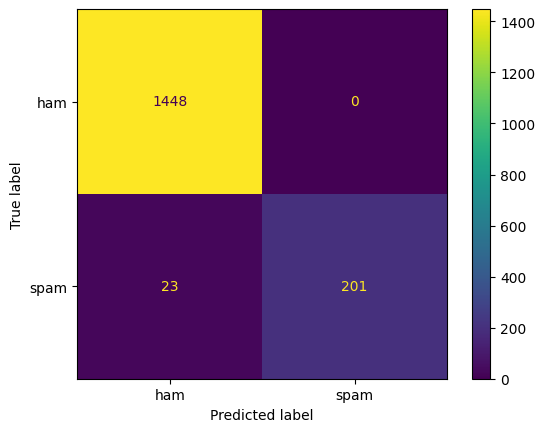

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       1.00      0.90      0.95       224

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672

Accuracy:  0.986244019138756


KeyboardInterrupt: ignored

In [19]:
#email/sms spam detecion module using ensemble learning using : 1- MultinomialNB()  2-LinearSVC()  3-DecisionTreeClassifier()
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Downloading Dataset into Colab Environment
!curl "https://raw.githubusercontent.com/erfan-hamidi/smart-text-analysis-dj/master/sms_dataset.tsv" --output sms_dataset.tsv

df = pd.read_csv("sms_dataset.tsv", delimiter='\t')

X = df.message   # X_feature
y = df.label   # y_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

count_vectorizer.fit(X_train)
X_train_cv = count_vectorizer.transform(X_train)
tfidf_transformer.fit(X_train_cv)
X_train_tfidf = tfidf_transformer.transform(X_train_cv)

X_test_cv = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_cv)

# Initialize the classifiers
naive_bayes = MultinomialNB()
linear_svc = LinearSVC()
decision_tree = DecisionTreeClassifier()

# Create the voting classifier
voting_classifier = VotingClassifier(
    estimators=[('nb', naive_bayes), ('svc', linear_svc), ('dt', decision_tree)],
    voting='hard'  # Use 'hard' voting for majority voting
)


voting_classifier.fit(X_train_tfidf, y_train)


prediction = voting_classifier.predict(X_test_tfidf)


ConfusionMatrixDisplay.from_estimator(voting_classifier, X_test_tfidf, y_test)
plt.show()


print(classification_report(y_test, prediction))
print("Accuracy: ", accuracy_score(y_test, prediction))


model_filename = 'ensemble_model.joblib'
joblib.dump(voting_classifier, model_filename)


def predict_spam(input_string):
    # Load the saved model
    loaded_model = joblib.load(model_filename)


    input_tfidf = tfidf_transformer.transform(count_vectorizer.transform([input_string]))


    prediction = loaded_model.predict(input_tfidf)

    return "Spam" if prediction[0] == 1 else "Not Spam"

result = predict_spam(input())
print(f"Input: '{input_string}' - Prediction: {result}")


